In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
from utils.tools import dotdict
from CNN_Forecaster_Wrapper import CNN_Forecaster
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.set_device(3) 

# Testing ATD Protocol

In [4]:
truth = atd2022.io.read_csv()

In [5]:
args = dotdict()

args.dim = 1024
args.use_gpu = True
args.batch_size = 30
args.train_epochs=40
args.lr = 0.001
args.history_len =35

In [6]:
exp = CNN_Forecaster(args)

In [7]:
exp.fit(truth)

Use GPU: cuda:None
train_loss 4190198.5
train_loss 4082846.25
train_loss 3960821.75
train_loss 3800544.9
train_loss 3539024.45


KeyboardInterrupt: 

In [11]:
test=exp.predict([1,2,3,4])

/scratch/wzong/LISP-ATD-2022/CNN/driver/atd_CNN.py:131: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = model(torch.tensor(inputs).to(device).float()).cpu().detach().numpy()
/scratch/wzong/LISP-ATD-2022/CNN/CNN_Forecaster_Wrapper.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions[predictions<=0]=0
/scratch/wzong/anaconda3/envs/atd2022/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [12]:
test

Region                  AA                                                \
Event                   01    02    03    04   05    06   07    08    09   
2018-02-12/2018-02-18  1.0  20.0  41.0  22.0  6.0   1.0  4.0   0.0   2.0   
2018-02-19/2018-02-25  2.0  13.0   0.0  42.0  8.0   6.0  3.0   0.0  16.0   
2018-02-26/2018-03-04  4.0  11.0   3.0  50.0  0.0   5.0  4.0   0.0  25.0   
2018-03-05/2018-03-11  3.0   6.0   3.0  41.0  0.0  13.0  9.0  17.0   4.0   

Region                                                                         \
Event                    10    11     12    13    14     15    16    17    18   
2018-02-12/2018-02-18   1.0  35.0   46.0  59.0  44.0   45.0  26.0  28.0  76.0   
2018-02-19/2018-02-25   2.0  36.0  111.0  54.0  95.0   65.0  36.0  39.0  59.0   
2018-02-26/2018-03-04  10.0  78.0   56.0  62.0  34.0  132.0  16.0  13.0  34.0   
2018-03-05/2018-03-11  17.0  35.0   50.0  34.0  67.0  112.0  40.0   0.0  26.0   

Region                                 AC                                      \
Event                     19     20    01    02    03    04    05    06    07   
2018-02-12/2018-02-18  104.0  111.0  41.0  12.0  51.0  26.0   0.0  20.0   2.0   
2018-02-19/2018-02-25  120.0   12.0  25.0  12.0   8.0  26.0   5.0   0.0   1.0   
2018-02-26/2018-03-04   43.0    0.0  63.0  12.0  12.0  21.0  43.0  15.0  18.0   
2018-03-05/2018-03-11   60.0    0.0  66.0   1.0   8.0   9.0  12.0  14.0   8.0   

Region                                                                    \
Event                    08    09    10    11     12     13    14     15   
2018-02-12/2018-02-18   7.0   1.0   5.0   1.0    2.0    1.0   3.0    1.0   
2018-02-19/2018-02-25   4.0   3.0   8.0   0.0   24.0   23.0  22.0   44.0   
2018-02-26/2018-03-04  30.0  39.0  85.0  10.0   85.0   69.0  48.0   90.0   
2018-03-05/2018-03-11  33.0   5.0  10.0  31.0  143.0  101.0  76.0  109.0   

Region                                                        AE         \
Event                     16     17     18     19     20      01     02   
2018-02-12/2018-02-18   57.0   86.0  255.0  169.0  185.0   307.0  221.0   
2018-02-19/2018-02-25   71.0   26.0  104.0   94.0  112.0   193.0  289.0   
2018-02-26/2018-03-04  107.0   44.0   43.0  110.0  126.0   217.0  202.0   
2018-03-05/2018-03-11  187.0  108.0   58.0  205.0  108.0  1237.0  130.0   

Region                                                                       \
Event                     03     04     05     06    07    08     09     10   
2018-02-12/2018-02-18   60.0  320.0  106.0  460.0  20.0  12.0   24.0   36.0   
2018-02-19/2018-02-25  419.0  562.0    0.0  713.0  80.0  99.0  159.0  243.0   
2018-02-26/2018-03-04  353.0  517.0   47.0  675.0  93.0  86.0  166.0  184.0   
2018-03-05/2018-03-11  126.0  333.0  185.0  653.0  97.0  68.0  167.0  174.0   

Region                                                                      \
Event                     11    12    13     14    15     16     17     18   
2018-02-12/2018-02-18   97.0  17.0  34.0   58.0   3.0  270.0  144.0  207.0   
2018-02-19/2018-02-25  193.0   0.0  29.0   39.0  15.0  134.0  284.0  165.0   
2018-02-26/2018-03-04  158.0  11.0  19.0   60.0  14.0  274.0  377.0  155.0   
2018-03-05/2018-03-11  212.0  88.0  44.0  172.0  49.0  144.0  255.0   58.0   

Region                                  AF                                \
Event                     19     20     01      02     03      04     05   
2018-02-12/2018-02-18  573.0  132.0  771.0  1761.0  654.0  2212.0  605.0   
2018-02-19/2018-02-25  744.0  201.0  884.0  1898.0  942.0  2238.0  884.0   
2018-02-26/2018-03-04  580.0  498.0  982.0  1718.0  553.0  1630.0  652.0   
2018-03-05/2018-03-11  357.0  347.0  617.0  1772.0  534.0  1895.0  636.0   

Region                                                                        \
Event                     06     07     08     09     10     11     12    13   
2018-02-12/2018-02-18  462.0  160.0   91.0  111.0   32.0  121.0   83.0  62.0   
2018-02-19/2018-02-2

# Full Scale Testing

In [16]:
args = dotdict()

# args.dim = 1024
# args.use_gpu = True
# args.batch_size = 30
# args.train_epochs=500
# args.lr = 0.001
# args.history_len =52

args.dim = 4096
args.use_gpu = True
args.batch_size = 30
args.train_epochs=900
args.lr = 0.001
args.history_len =52

In [17]:
lispDL = CNN_Forecaster(args)

In [18]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
)

In [19]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispDL,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<CNN_Forecaster_Wrapper.CNN_Forecaster object at 0x7f3110735f70>:   0%|          | 0/5 [00:00<?, ?it/s]

Use GPU: cuda:None
train_loss 3411526.25
train_loss 3531665.25
train_loss 3366245.0
train_loss 3362501.25
train_loss 3311364.0
train_loss 3246678.25
train_loss 3185675.75
train_loss 3123875.0
train_loss 3056179.25
train_loss 2979280.5
train_loss 2890245.75
train_loss 2787196.5
train_loss 2669868.5
train_loss 2539411.25
train_loss 2397851.0
train_loss 2247007.75
train_loss 2089165.875
train_loss 1926260.75
train_loss 1760159.125
train_loss 1593210.25
train_loss 1427759.125
train_loss 1266143.5
train_loss 1110837.125
train_loss 964784.5625
train_loss 832014.0625
train_loss 716625.1875
train_loss 621848.6875
train_loss 548547.6875
train_loss 494589.8125
train_loss 454450.09375
train_loss 420788.4375
train_loss 386803.375
train_loss 348448.9375
train_loss 305459.9375
train_loss 260291.921875
train_loss 216940.53125
train_loss 179458.28125
train_loss 150998.90625
train_loss 132954.953125
train_loss 124892.6171875
train_loss 124890.859375
train_loss 130080.3203125
train_loss 137295.015625
tr

train_loss 35443.26953125
train_loss 35363.21875
train_loss 35282.515625
train_loss 35200.078125
train_loss 35119.26171875
train_loss 35039.13671875
train_loss 34961.6015625
train_loss 34886.859375
train_loss 34811.984375
train_loss 34739.2109375
train_loss 34666.15625
train_loss 34593.4921875
train_loss 34517.34765625
train_loss 34436.66796875
train_loss 34353.2734375
train_loss 34270.84375
train_loss 34191.48046875
train_loss 34115.8203125
train_loss 34041.62890625
train_loss 33969.203125
train_loss 33895.140625
train_loss 33818.86328125
train_loss 33743.18359375
train_loss 33665.41015625
train_loss 33587.765625
train_loss 33510.5078125
train_loss 33433.23828125
train_loss 33357.01953125
train_loss 33281.5625
train_loss 33207.46484375
train_loss 33132.9296875
train_loss 33059.296875
train_loss 32986.9375
train_loss 32915.39453125
train_loss 32846.94921875
train_loss 32781.140625
train_loss 32715.234375
train_loss 32646.087890625
train_loss 32564.119140625
train_loss 32475.87109375
tr

train_loss 12501.9384765625
train_loss 12447.267578125
train_loss 12402.248046875
train_loss 12367.689453125
train_loss 12339.6337890625
train_loss 12310.6337890625
train_loss 12273.3525390625
train_loss 12231.0068359375
train_loss 12186.5126953125
train_loss 12144.048828125
train_loss 12106.8115234375
train_loss 12074.7607421875
train_loss 12043.083984375
train_loss 12006.5908203125
train_loss 11975.6435546875
train_loss 11942.779296875
train_loss 11909.685546875
train_loss 11873.5
train_loss 11836.2734375
train_loss 11798.7861328125
train_loss 11762.880859375
train_loss 11726.765625
train_loss 11691.962890625
train_loss 11656.7890625
train_loss 11622.6220703125
train_loss 11588.41796875
train_loss 11554.919921875
train_loss 11521.1982421875
train_loss 11488.9169921875
train_loss 11455.5068359375
train_loss 11422.6015625
train_loss 11390.8740234375
train_loss 11359.8701171875
train_loss 11332.7138671875
train_loss 11310.6630859375
train_loss 11296.7568359375
train_loss 11298.092773437

train_loss 74246.09375
train_loss 71949.6328125
train_loss 69993.6875
train_loss 68439.5078125
train_loss 67291.875
train_loss 66495.3515625
train_loss 65935.484375
train_loss 65488.54296875
train_loss 65041.7421875
train_loss 64505.0078125
train_loss 63840.22265625
train_loss 63088.3046875
train_loss 62339.47265625
train_loss 61684.16015625
train_loss 61185.6875
train_loss 60837.51953125
train_loss 60583.17578125
train_loss 60359.2734375
train_loss 60118.73828125
train_loss 59842.36328125
train_loss 59542.07421875
train_loss 59221.4765625
train_loss 58881.734375
train_loss 58533.84375
train_loss 58195.390625
train_loss 57890.27734375
train_loss 57634.68359375
train_loss 57432.09765625
train_loss 57278.609375
train_loss 57160.40234375
train_loss 57061.98046875
train_loss 56965.4140625
train_loss 56856.890625
train_loss 56722.68359375
train_loss 56562.0390625
train_loss 56381.79296875
train_loss 56192.56640625
train_loss 56005.90625
train_loss 55835.54296875
train_loss 55683.3671875
tra

train_loss 30902.787109375
train_loss 30832.708984375
train_loss 30761.005859375
train_loss 30689.27734375
train_loss 30620.009765625
train_loss 30550.78125
train_loss 30481.982421875
train_loss 30412.525390625
train_loss 30345.330078125
train_loss 30278.951171875
train_loss 30212.001953125
train_loss 30142.5390625
train_loss 30068.4375
train_loss 29995.70703125
train_loss 29929.6484375
train_loss 29863.69921875
train_loss 29793.33984375
train_loss 29719.96875
train_loss 29653.4609375
train_loss 29587.08203125
train_loss 29516.658203125
train_loss 29445.58203125
train_loss 29378.369140625
train_loss 29309.88671875
train_loss 29238.05859375
train_loss 29167.62890625
train_loss 29098.275390625
train_loss 29029.427734375
train_loss 28959.662109375
train_loss 28891.890625
train_loss 28824.75390625
train_loss 28756.5859375
train_loss 28688.375
train_loss 28621.68359375
train_loss 28555.3359375
train_loss 28489.587890625
train_loss 28425.279296875
train_loss 28361.5078125
train_loss 28297.15

train_loss 13580.2197265625
train_loss 13540.552734375
train_loss 13506.91015625
train_loss 13476.470703125
train_loss 13448.3984375
train_loss 13421.4765625
train_loss 13396.6220703125
train_loss 13372.064453125
train_loss 13348.2548828125
train_loss 13322.2216796875
train_loss 13293.0361328125
train_loss 13257.2587890625
train_loss 13215.345703125
train_loss 13164.2197265625
train_loss 13110.0634765625
train_loss 13053.88671875
train_loss 13003.01953125
train_loss 12958.8369140625
train_loss 12921.1884765625
train_loss 12889.328125
train_loss 12860.765625
train_loss 12835.9248046875
train_loss 12814.025390625
train_loss 12796.029296875
train_loss 12778.2451171875
train_loss 12761.5419921875
train_loss 12740.8447265625
train_loss 12715.6875
train_loss 12677.2060546875
train_loss 12627.080078125
train_loss 12566.791015625
train_loss 12505.6806640625
train_loss 12447.68359375
train_loss 12400.087890625
train_loss 12363.4560546875
train_loss 12337.14453125
train_loss 12316.5908203125
tra

train_loss 56781.015625
train_loss 56659.671875
train_loss 56529.4296875
train_loss 56399.6953125
train_loss 56276.921875
train_loss 56155.18359375
train_loss 56025.140625
train_loss 55889.7109375
train_loss 55750.4609375
train_loss 55617.140625
train_loss 55490.88671875
train_loss 55372.0390625
train_loss 55248.70703125
train_loss 55119.1640625
train_loss 54992.7265625
train_loss 54875.8125
train_loss 54762.8984375
train_loss 54649.11328125
train_loss 54533.96875
train_loss 54420.48046875
train_loss 54310.234375
train_loss 54200.53125
train_loss 54088.1796875
train_loss 53973.9296875
train_loss 53859.5
train_loss 53743.609375
train_loss 53622.73828125
train_loss 53497.09375
train_loss 53368.71875
train_loss 53237.30859375
train_loss 53098.32421875
train_loss 52949.53125
train_loss 52790.7734375
train_loss 52623.56640625
train_loss 52459.2890625
train_loss 52299.41796875
train_loss 52139.3671875
train_loss 51990.0625
train_loss 51860.20703125
train_loss 51751.30078125
train_loss 51657.

train_loss 28893.982421875
train_loss 28827.431640625
train_loss 28761.701171875
train_loss 28696.015625
train_loss 28630.2421875
train_loss 28565.080078125
train_loss 28499.375
train_loss 28433.740234375
train_loss 28368.390625
train_loss 28302.87109375
train_loss 28237.74609375
train_loss 28172.662109375
train_loss 28107.677734375
train_loss 28041.896484375
train_loss 27977.423828125
train_loss 27912.658203125
train_loss 27847.515625
train_loss 27783.20703125
train_loss 27718.455078125
train_loss 27654.20703125
train_loss 27590.3046875
train_loss 27525.736328125
train_loss 27461.267578125
train_loss 27397.314453125
train_loss 27333.458984375
train_loss 27269.560546875
train_loss 27205.798828125
train_loss 27142.13671875
train_loss 27078.427734375
train_loss 27014.94140625
train_loss 26951.56640625
train_loss 26887.986328125
train_loss 26824.8515625
train_loss 26761.78125
train_loss 26698.6953125
train_loss 26635.939453125
train_loss 26572.990234375
train_loss 26510.421875
train_loss 

train_loss 13314.3583984375
train_loss 13283.080078125
train_loss 13252.064453125
train_loss 13221.998046875
train_loss 13192.4375
train_loss 13162.0654296875
train_loss 13131.533203125
train_loss 13101.26953125
train_loss 13071.6748046875
train_loss 13042.03515625
train_loss 13012.1533203125
train_loss 12982.4072265625
train_loss 12953.3876953125
train_loss 12924.240234375
train_loss 12895.2763671875
train_loss 12865.974609375
train_loss 12836.94921875
train_loss 12807.873046875
train_loss 12779.263671875
train_loss 12750.474609375
train_loss 12721.171875
train_loss 12693.4423828125
train_loss 12664.9658203125
train_loss 12636.5859375
train_loss 12608.6005859375
train_loss 12580.939453125
train_loss 12554.3701171875
train_loss 12526.4130859375
train_loss 12500.603515625
train_loss 12469.12890625
train_loss 12439.765625
train_loss 12412.0693359375
train_loss 12385.8076171875
train_loss 12359.71875
train_loss 12330.513671875
train_loss 12301.365234375
train_loss 12274.5859375
train_loss

train_loss 51173.2890625
train_loss 51154.546875
train_loss 50970.27734375
train_loss 50848.66015625
train_loss 50762.8046875
train_loss 50667.45703125
train_loss 50564.8828125
train_loss 50459.43359375
train_loss 50351.26953125
train_loss 50239.79296875
train_loss 50123.421875
train_loss 49999.6171875
train_loss 49869.22265625
train_loss 49754.17578125
train_loss 49666.33203125
train_loss 49563.43359375
train_loss 49438.94921875
train_loss 49319.40625
train_loss 49215.1328125
train_loss 49115.51171875
train_loss 49011.18359375
train_loss 48899.046875
train_loss 48782.41796875
train_loss 48668.875
train_loss 48562.33984375
train_loss 48457.2109375
train_loss 48348.9296875
train_loss 48237.0390625
train_loss 48124.69140625
train_loss 48012.9296875
train_loss 47904.234375
train_loss 47796.59765625
train_loss 47686.09765625
train_loss 47572.97265625
train_loss 47458.06640625
train_loss 47342.44921875
train_loss 47225.67578125
train_loss 47108.01171875
train_loss 46989.6015625
train_loss 4

train_loss 19289.556640625
train_loss 19224.658203125
train_loss 19160.23828125
train_loss 19096.162109375
train_loss 19032.0390625
train_loss 18969.126953125
train_loss 18906.3125
train_loss 18843.70703125
train_loss 18781.7265625
train_loss 18720.751953125
train_loss 18659.208984375
train_loss 18597.798828125
train_loss 18536.458984375
train_loss 18475.615234375
train_loss 18415.986328125
train_loss 18356.345703125
train_loss 18296.1484375
train_loss 18236.994140625
train_loss 18179.1484375
train_loss 18120.27734375
train_loss 18061.32421875
train_loss 18003.75390625
train_loss 17946.333984375
train_loss 17888.125
train_loss 17830.62890625
train_loss 17773.830078125
train_loss 17716.818359375
train_loss 17661.609375
train_loss 17605.888671875
train_loss 17548.80078125
train_loss 17494.52734375
train_loss 17440.8046875
train_loss 17384.427734375
train_loss 17332.296875
train_loss 17277.015625
train_loss 17224.265625
train_loss 17167.3984375
train_loss 17119.169921875
train_loss 17063.

train_loss 7951.9833984375
train_loss 7934.03759765625
train_loss 7917.5087890625
train_loss 7898.126953125
train_loss 7882.47802734375
train_loss 7867.29541015625
train_loss 7849.40966796875
train_loss 7833.4482421875
train_loss 7813.53759765625
train_loss 7794.7373046875
train_loss 7772.03369140625
train_loss 7743.90478515625
train_loss 7719.44384765625
train_loss 7689.4736328125
train_loss 7662.78662109375
train_loss 7643.1279296875
train_loss 7621.8271484375
train_loss 7604.42578125
train_loss 7588.46875
train_loss 7571.23681640625
train_loss 7557.4365234375
train_loss 7543.54443359375
train_loss 7530.06591796875
train_loss 7519.6455078125
train_loss 7508.65625
train_loss 7497.40234375
train_loss 7479.57421875
train_loss 7455.29052734375
train_loss 7423.81640625
train_loss 7390.849609375
train_loss 7361.16748046875
train_loss 7336.8330078125
train_loss 7317.5517578125
train_loss 7303.6552734375
train_loss 7292.416015625
train_loss 7278.1708984375
train_loss 7261.20361328125
train_l

train_loss 38486.015625
train_loss 38381.9765625
train_loss 38277.51171875
train_loss 38171.54296875
train_loss 38063.8125
train_loss 37955.2265625
train_loss 37843.9140625
train_loss 37727.78125
train_loss 37608.12109375
train_loss 37483.33203125
train_loss 37352.2265625
train_loss 37216.05859375
train_loss 37077.6875
train_loss 36940.7109375
train_loss 36811.625
train_loss 36694.98828125
train_loss 36597.234375
train_loss 36519.55859375
train_loss 36457.453125
train_loss 36400.26953125
train_loss 36337.87109375
train_loss 36261.7265625
train_loss 36170.75390625
train_loss 36069.6796875
train_loss 35967.49609375
train_loss 35869.89453125
train_loss 35780.546875
train_loss 35698.62109375
train_loss 35623.05859375
train_loss 35548.97265625
train_loss 35475.3125
train_loss 35400.875
train_loss 35324.890625
train_loss 35247.453125
train_loss 35168.0
train_loss 35087.99609375
train_loss 35006.30078125
train_loss 34925.1171875
train_loss 34845.44921875
train_loss 34766.6875
train_loss 34689

train_loss 17561.150390625
train_loss 17517.857421875
train_loss 17475.32421875
train_loss 17434.23046875
train_loss 17391.947265625
train_loss 17349.345703125
train_loss 17306.04296875
train_loss 17263.98046875
train_loss 17221.064453125
train_loss 17178.12109375
train_loss 17137.166015625
train_loss 17094.703125
train_loss 17052.494140625
train_loss 17011.845703125
train_loss 16970.01953125
train_loss 16928.302734375
train_loss 16887.369140625
train_loss 16845.62890625
train_loss 16803.19140625
train_loss 16764.703125
train_loss 16722.1015625
train_loss 16680.744140625
train_loss 16640.361328125
train_loss 16600.45703125
train_loss 16559.404296875
train_loss 16518.771484375
train_loss 16479.05859375
train_loss 16438.677734375
train_loss 16398.49609375
train_loss 16358.736328125
train_loss 16319.7412109375
train_loss 16279.58984375
train_loss 16240.5380859375
train_loss 16201.5576171875
train_loss 16162.30078125
train_loss 16123.2216796875
train_loss 16084.4638671875
train_loss 16045.

train_loss 8980.4619140625
train_loss 8950.19140625
train_loss 8935.59375
train_loss 8923.3203125
train_loss 8899.0888671875
train_loss 8874.4130859375
train_loss 8862.041015625
train_loss 8846.9462890625
train_loss 8820.8359375
train_loss 8801.388671875
train_loss 8789.7861328125
train_loss 8770.9697265625
train_loss 8747.318359375
train_loss 8730.2060546875
train_loss 8716.72265625


PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CNN_Forecaster_Wrapper.CNN_Forecaster object at 0x7f4750240f40>,4.668318,253.199027
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CNN_Forecaster_Wrapper.CNN_Forecaster object a... 0                 4.126558   
                                                   1                 4.440353   
                                                   2                 4.724894   
                                                   3                 5.381469   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CNN_Forecaster_Wrapper.CNN_Forecaster object a... 0        213.566610  
                                                   1        232.109560  
                                                   2        249.310591  
                                                   3        283.557645  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

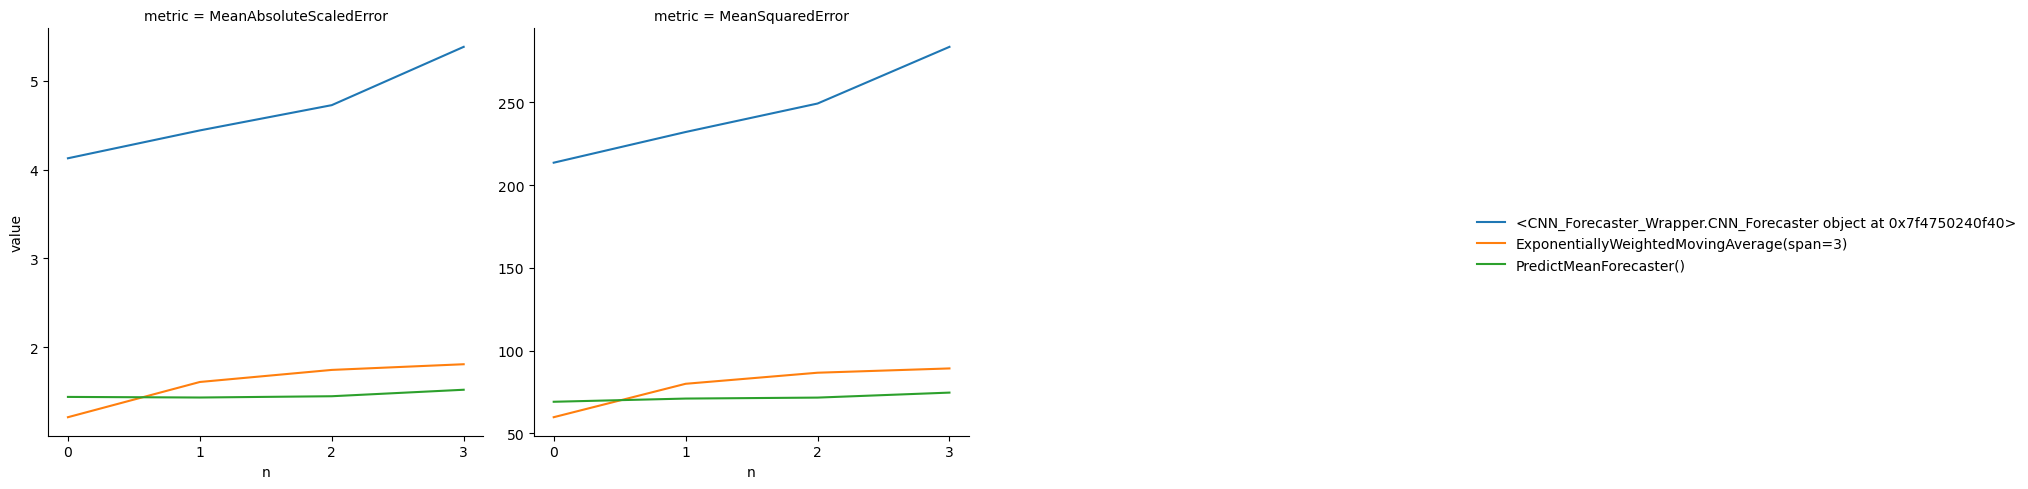

In [16]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<CNN_Forecaster_Wrapper.CNN_Forecaster object at 0x7f36c06ad730>,2.099037,114.568474
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                              n                            
<CNN_Forecaster_Wrapper.CNN_Forecaster object a... 0                 1.999364   
                                                   1                 2.071197   
                                                   2                 2.145220   
                                                   3                 2.180369   
ExponentiallyWeightedMovingAverage(span=3)         0                 1.210449   
                                                   1                 1.607165   
                                                   2                 1.743103   
                                                   3                 1.806993   
PredictMeanForecaster()                            0                 1.438947   
                                                   1                 1.432186   
                                                   2                 1.446583   
                                                   3                 1.519656   

                                                      MeanSquaredError  
model                                              n                    
<CNN_Forecaster_Wrapper.CNN_Forecaster object a... 0        104.523647  
                                                   1        107.218689  
                                                   2        112.168444  
                                                   3        114.549426  
ExponentiallyWeightedMovingAverage(span=3)         0         59.782868  
                                                   1         79.974515  
                                                   2         86.659919  
                                                   3         89.252260  
PredictMeanForecaster()                            0         69.110252  
                                                   1         71.046277  
                                                   2         71.629932  
                                                   3         74.645810

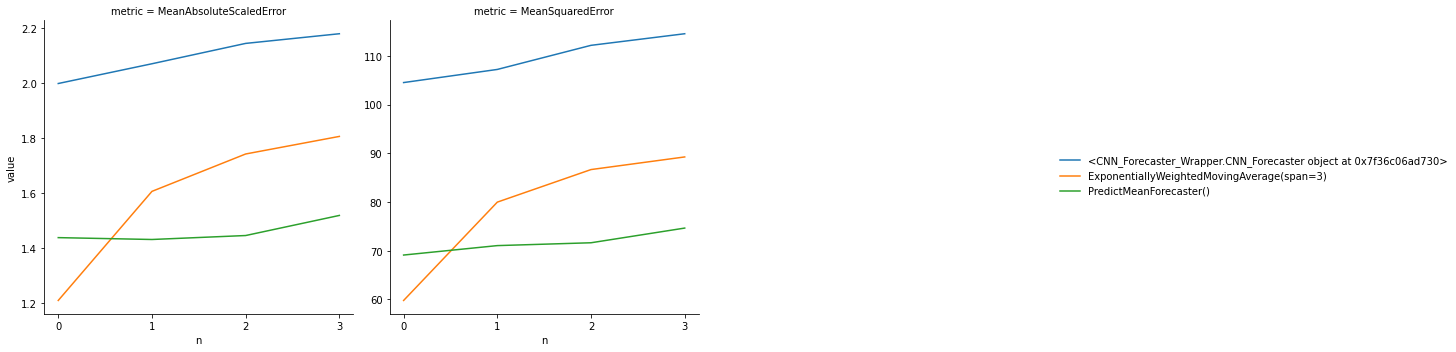

In [8]:
# args.dim = 4096
# args.use_gpu = True
# args.batch_size = 30
# args.train_epochs=950
# args.lr = 0.001
# args.history_len =35
# Vanila CNN

metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))